In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("toyotacorolla-MLR.csv",encoding = 'unicode_escape')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## EDA

In [22]:
data.shape

(1436, 11)

In [41]:
data1=data.iloc[:,[0,1,2,4,6,7,8,9,10]]
data1

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,4,5,1025
1432,10845,72,19000,86,1300,3,4,5,1015
1433,8500,71,17016,86,1300,3,4,5,1015
1434,7250,70,16916,86,1300,3,4,5,1015


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age_08_04  1436 non-null   int64
 1   KM         1436 non-null   int64
 2   HP         1436 non-null   int64
 3   cc         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [25]:
data1[data1.duplicated()]

,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight
113,8,13253,116,2000,5,4,5,1320
1269,69,75000,86,1300,4,4,5,1000


In [26]:
data1=data1.drop_duplicates().reset_index(drop=True)
data1

,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight
0,23,46986,90,2000,3,4,5,1165
1,23,72937,90,2000,3,4,5,1165
2,24,41711,90,2000,3,4,5,1165
3,26,48000,90,2000,3,4,5,1165
4,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...
1429,69,20544,86,1300,3,4,5,1025
1430,72,19000,86,1300,3,4,5,1015
1431,71,17016,86,1300,3,4,5,1015
1432,70,16916,86,1300,3,4,5,1015


In [27]:
data1.shape

(1434, 8)

In [28]:
data1.describe()

,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.0,1434.000000,1434.000000
mean,55.971409,68567.299861,101.502789,1576.753835,4.032775,4.0,5.026499,1072.337517
std,18.566600,37503.788895,14.981041,424.472672,0.952999,0.0,0.188639,52.235194
min,1.000000,1.000000,69.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,44.000000,43000.000000,90.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,61.000000,63389.500000,110.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,70.000000,87062.250000,110.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,80.000000,243000.000000,192.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [45]:
data1=data1.rename({'Age_08_04':'Age','Cylinders':'cy','Weight':'Wt'},axis=1)
data1

,Price,Age,KM,HP,cc,Doors,cy,Gears,Wt
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,4,5,1025
1432,10845,72,19000,86,1300,3,4,5,1015
1433,8500,71,17016,86,1300,3,4,5,1015
1434,7250,70,16916,86,1300,3,4,5,1015


In [46]:
data1.isnull().sum()

Price    0
Age      0
KM       0
HP       0
cc       0
Doors    0
cy       0
Gears    0
Wt       0
dtype: int64

# Correlation Analysis

In [47]:
data1.corr()

,Price,Age,KM,HP,cc,Doors,cy,Gears,Wt
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,NaN,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,NaN,0.209477,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,NaN,-0.160141,0.302618
cy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,NaN,1.000000,0.020613
Wt,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,NaN,0.020613,1.000000


<Axes: >

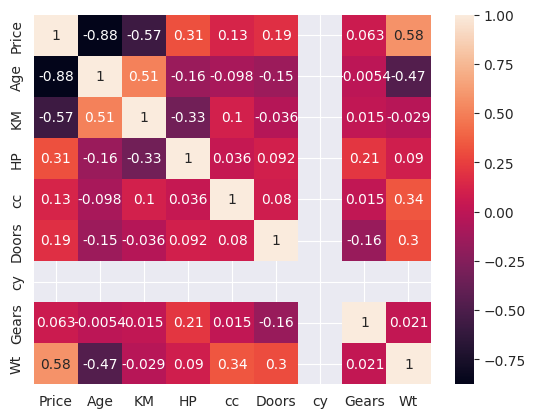

In [48]:
import seaborn as sns
sns.heatmap(data1.corr(),annot=True)

# Scatterplot b/w Variables alongwith Histogram

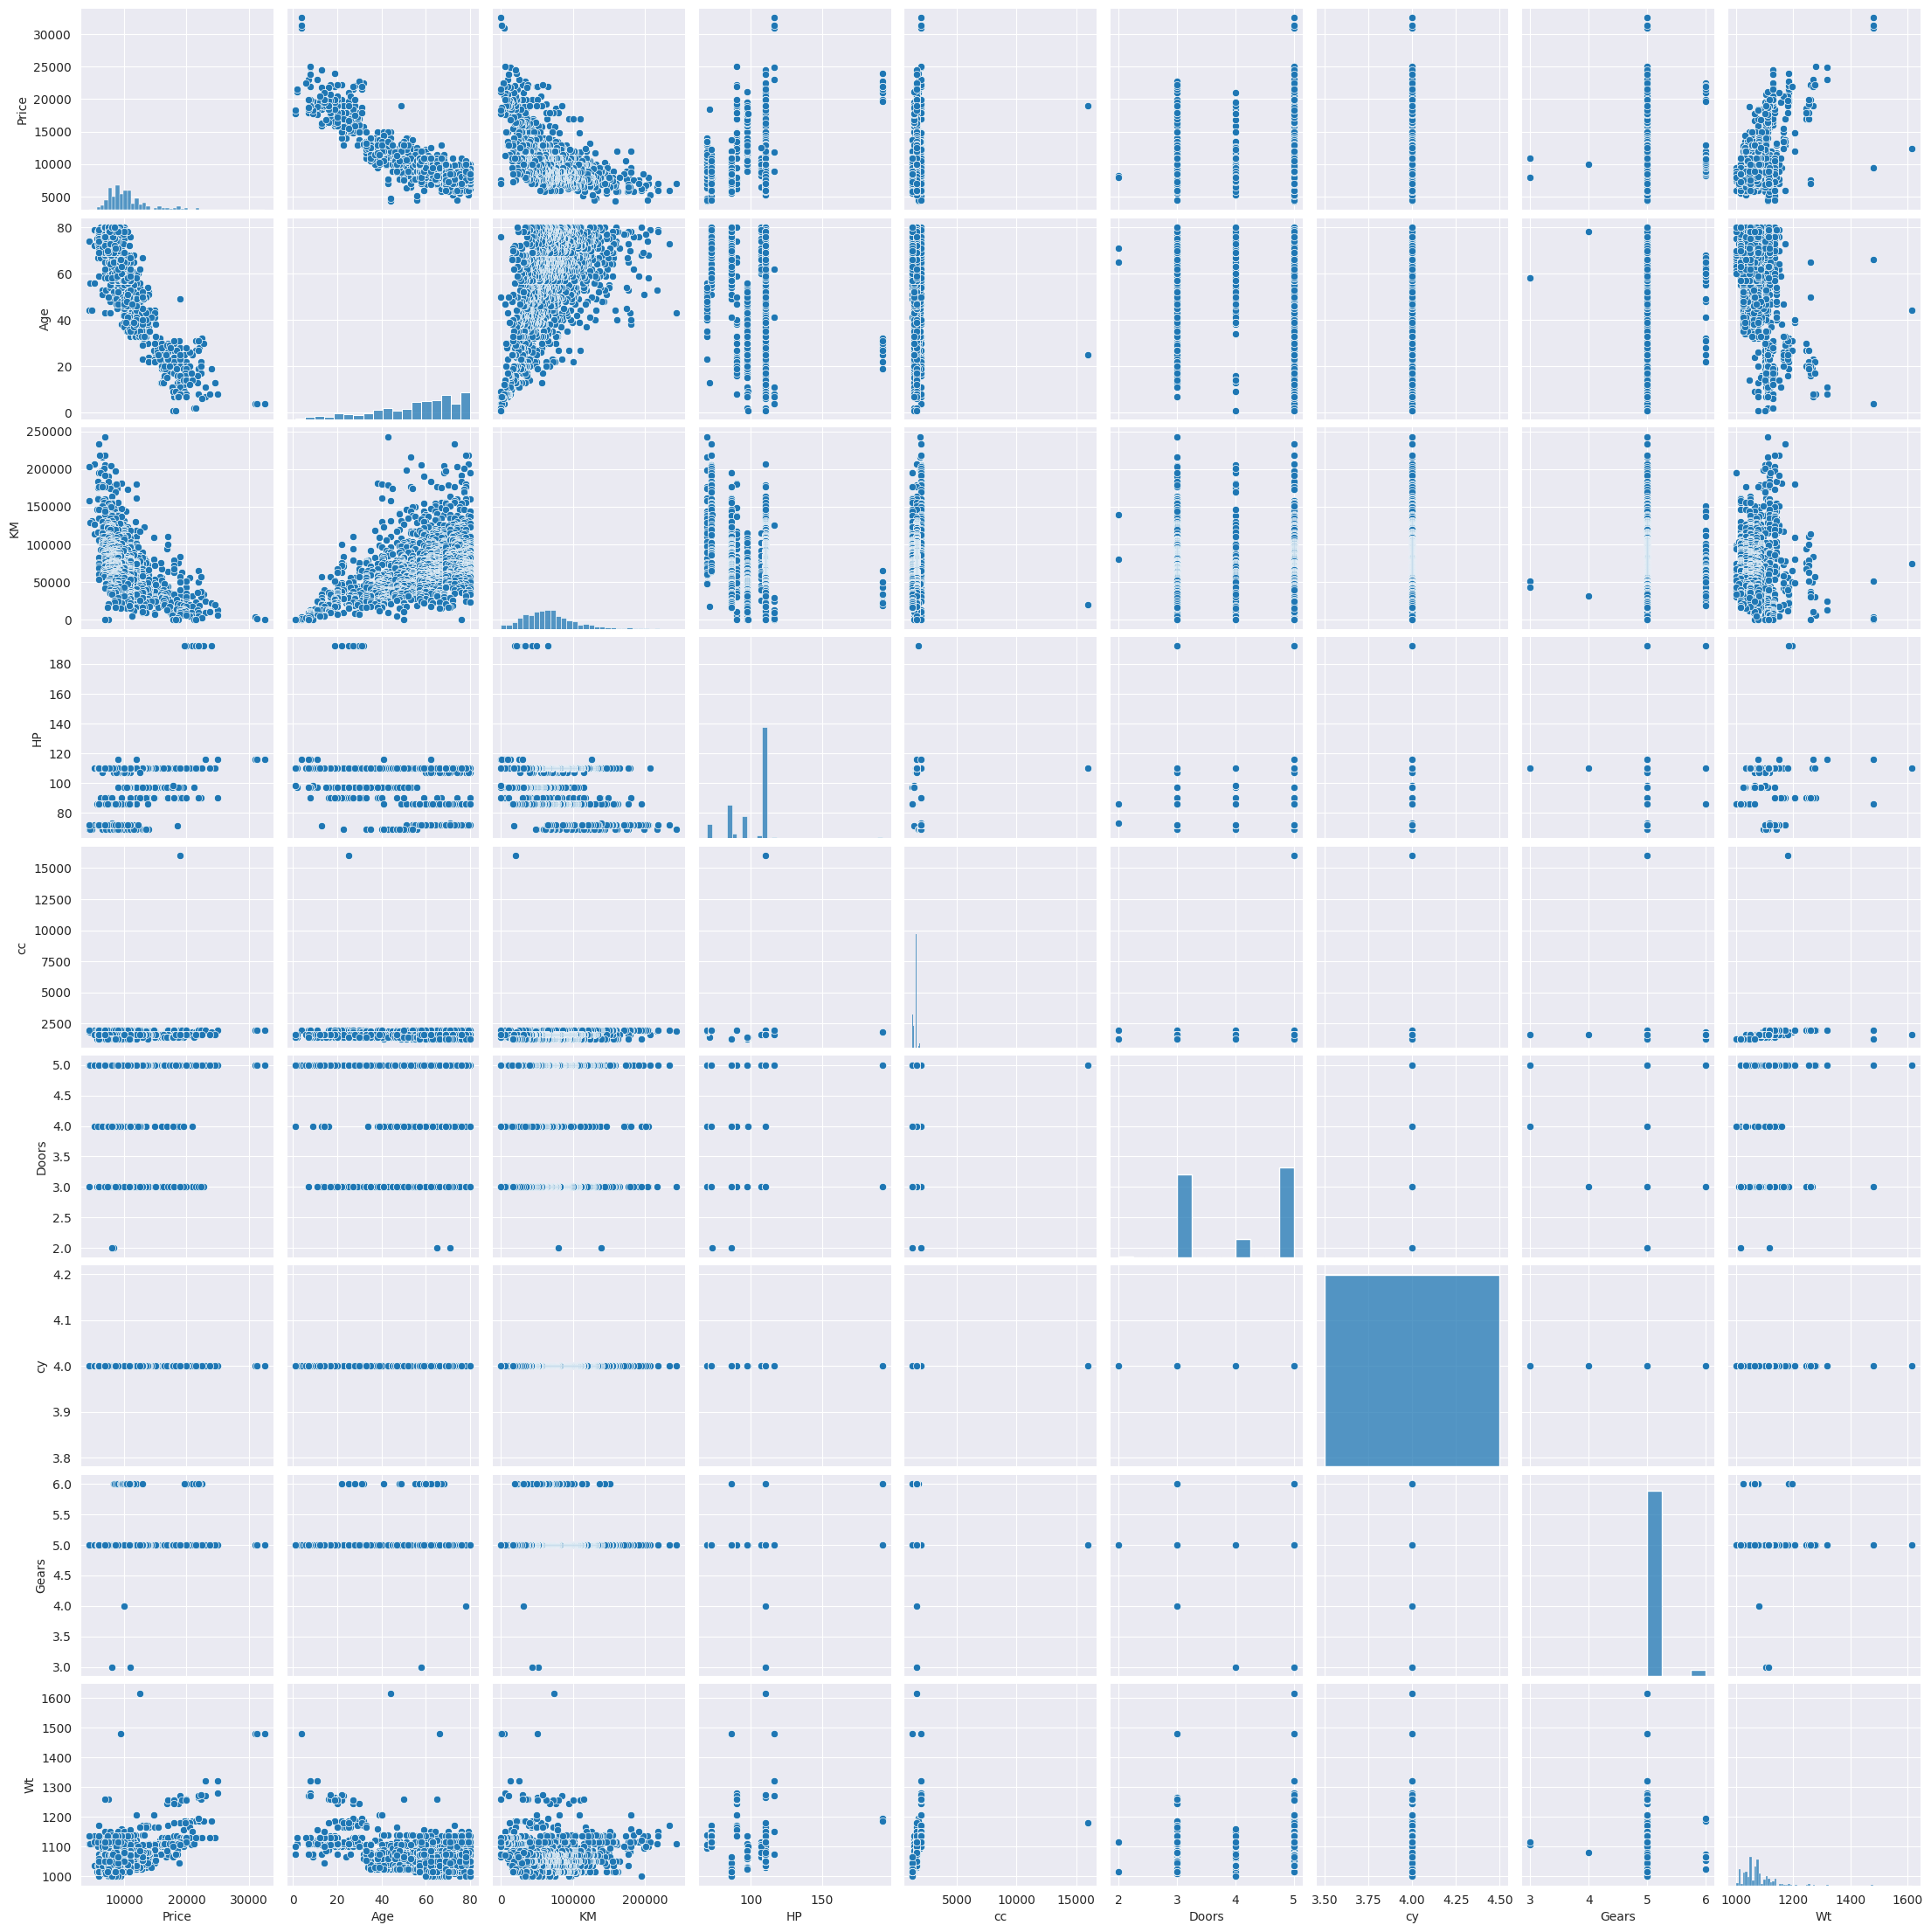

In [49]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Preparing a Model

In [57]:
import statsmodels.formula.api as smf
model = smf.ols(formula ='Price~Age+ KM + HP + cc + Doors+cy +Gears + Wt',data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        13:24:45   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -418.6302     77.585     -5.396      0.000    -570.823    -266.437
Age         -122.2345      2.616    -46.725      0.000    -127.366    -117.103
KM            -0.0199      0.001    -16.344      0.000      -0.022      -0.017
HP            28.4809      2.618     10.878      0.000      23.345      33.617
cc            -0.0881      0.090     -0.983      0.326      -0.264       0.088
Doors        -10.6794     40.005     -0.267      0.790     -89.155      67.796
cy         -1674.5209    310.340     -5.396      0.000   -2283.292   -1065.749
Gears        620.4166    197.422      3.143      0.002     233.149    1007.684
Wt            18.8542      0.866     21.781      0.000      17.156      20.552
==============================================================================
Omnibus:                      206.192   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1656.639
Skew:                          -0.400   Prob(JB):                         0.00
Kurtosis:                       8.201   Cond. No.                     2.00e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Coefficient

In [51]:
model.params

Intercept   -7116.713686
Age          -122.234520
KM             -0.019867
HP             28.480905
cc             -0.088120
Doors         -10.679443
Gears         620.416571
Wt             18.854232
dtype: float64

# VIF Calculation

In [59]:

rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+cy+Wt', data=data1).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+cy+Wt', data=data1).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+cy+Wt', data=data1).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+cy+Wt', data=data1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+cy+Wt', data=data1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+cy+Wt', data=data1).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_cy = smf.ols('cy~Age+KM+HP+cc+Doors+Gears+Wt', data=data1).fit().rsquared
vif_cy = 1/(1-rsq_cy)

rsq_Wt = smf.ols('Wt~Age+KM+HP+cc+Doors+Gears+cy', data=data1).fit().rsquared
vif_Wt = 1/(1-rsq_Wt)

d1 = {'variables' :['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears','cy','Wt'], 'VIF': [vif_Age, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears,vif_cy, vif_Wt]}
vif_frame = pd.DataFrame(d1)
vif_frame

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,Age,1.874559
1,KM,1.645618
2,HP,1.218056
3,cc,1.146729
4,Doors,1.150044
5,Gears,1.096603
6,cy,0.000000
7,Wt,1.643962


In [60]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula ='Price~Age+KM+HP+Doors+Gears+cy+Wt',data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        13:28:07   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
cy         -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Wt            18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     1.70e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model1.params

In [61]:
import statsmodels.formula.api as smf
model2 = smf.ols(formula ='Price~Age+KM+HP+cc+Gears+cy+Wt',data = data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1499.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        13:28:16   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -420.0327     77.382     -5.428      0.000    -571.827    -268.239
Age         -122.2362      2.615    -46.741      0.000    -127.366    -117.106
KM            -0.0199      0.001    -16.354      0.000      -0.022      -0.017
HP            28.4059      2.602     10.916      0.000      23.301      33.510
cc            -0.0875      0.090     -0.976      0.329      -0.263       0.088
Gears        630.6394    193.609      3.257      0.001     250.851    1010.428
cy         -1680.1306    309.527     -5.428      0.000   -2287.307   -1072.954
Wt            18.7949      0.836     22.473      0.000      17.154      20.435
==============================================================================
Omnibus:                      204.493   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1633.310
Skew:                          -0.395   Prob(JB):                         0.00
Kurtosis:                       8.165   Cond. No.                     1.70e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
model2.params

Intercept    -420.032660
Age          -122.236181
KM             -0.019871
HP             28.405911
cc             -0.087511
Gears         630.639351
cy          -1680.130641
Wt             18.794906
dtype: float64

In [63]:
(model.rsquared,model.aic)

(0.8628951602234527, 24776.19238098143)

In [64]:
(model1.rsquared,model1.aic)

(0.8628024511073656, 24775.163063711654)

In [65]:
(model2.rsquared,model2.aic)

(0.8628883181570981, 24774.264041195256)

# Test for Normality of Residuals(Q-Q plot)

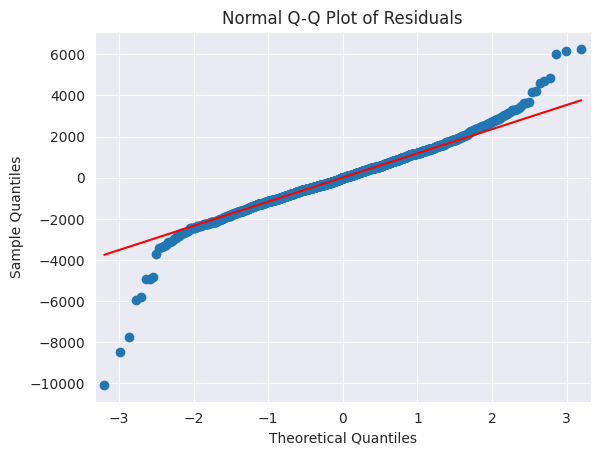

In [66]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()


In [67]:
import statsmodels.formula.api as smf
model_1 = smf.ols(formula = 'Price~Age+KM+HP+Doors+Gears+cy+Wt',data = data1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        13:29:31   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.8455     77.179     -5.323      0.000    -562.241    -259.450
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
cy         -1643.3820    308.714     -5.323      0.000   -2248.964   -1037.800
Wt            18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     1.70e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
import statsmodels.formula.api as smf
model_2 = smf.ols(formula ='Price~Age+KM+HP+cc+Gears+cy+Wt',data = data1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1499.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        13:29:43   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -420.0327     77.382     -5.428      0.000    -571.827    -268.239
Age         -122.2362      2.615    -46.741      0.000    -127.366    -117.106
KM            -0.0199      0.001    -16.354      0.000      -0.022      -0.017
HP            28.4059      2.602     10.916      0.000      23.301      33.510
cc            -0.0875      0.090     -0.976      0.329      -0.263       0.088
Gears        630.6394    193.609      3.257      0.001     250.851    1010.428
cy         -1680.1306    309.527     -5.428      0.000   -2287.307   -1072.954
Wt            18.7949      0.836     22.473      0.000      17.154      20.435
==============================================================================
Omnibus:                      204.493   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1633.310
Skew:                          -0.395   Prob(JB):                         0.00
Kurtosis:                       8.165   Cond. No.                     1.70e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
np.where(model.resid>10)

(array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  127,
         128,  134,  136,  138,  139,  141,  142,  143,  144,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         183,  190,  194,  196,  197,  201,  204,  205,  210,  211,  216,
         223,  230,  232,  233,  237, 

# Residual Plot For Homoscedasiticity

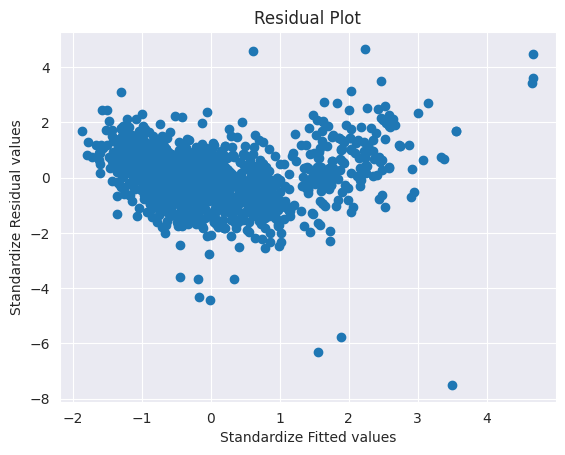

In [70]:
def get_standardize_values( vals):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residual Plot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

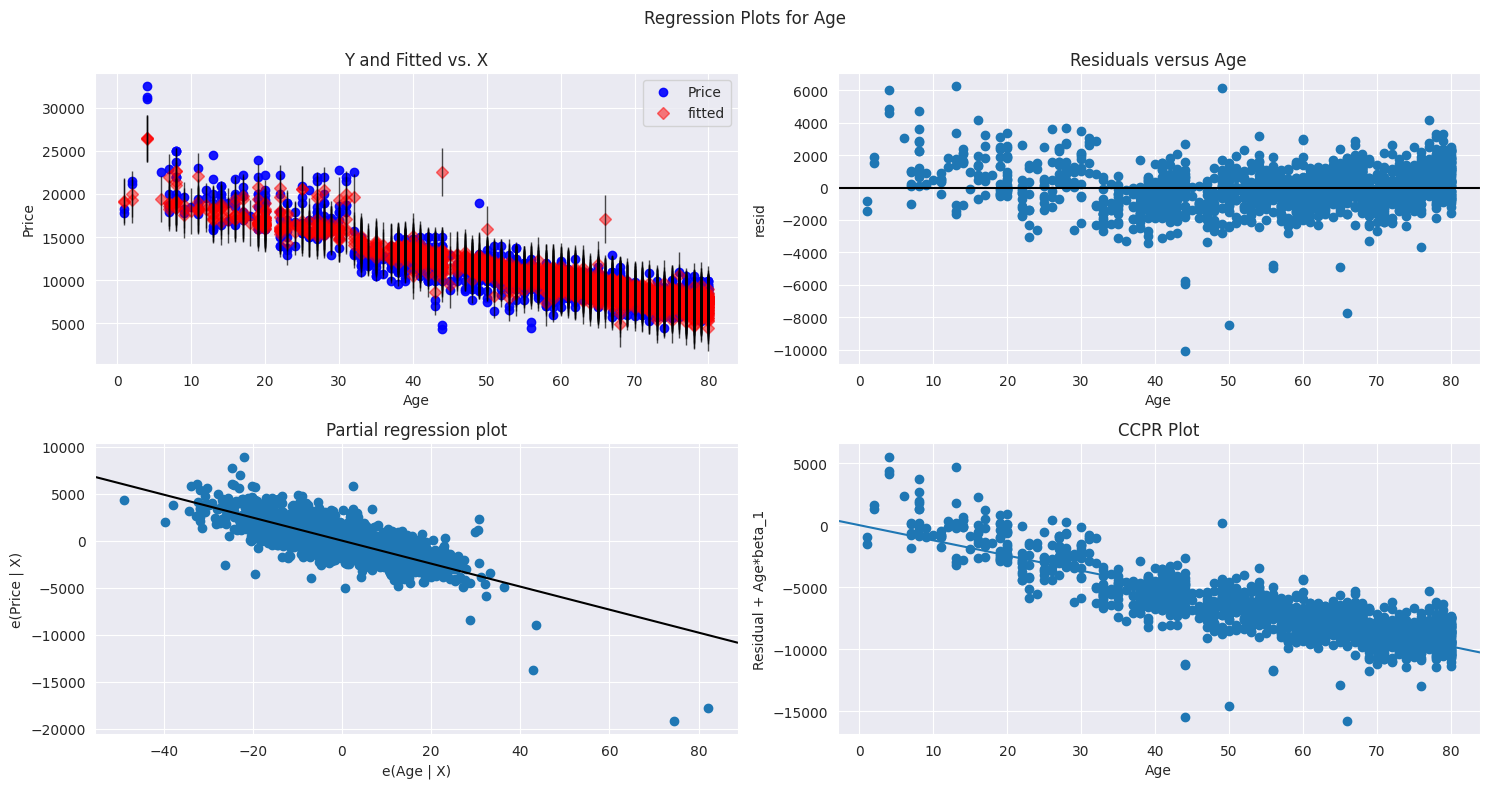

In [72]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show

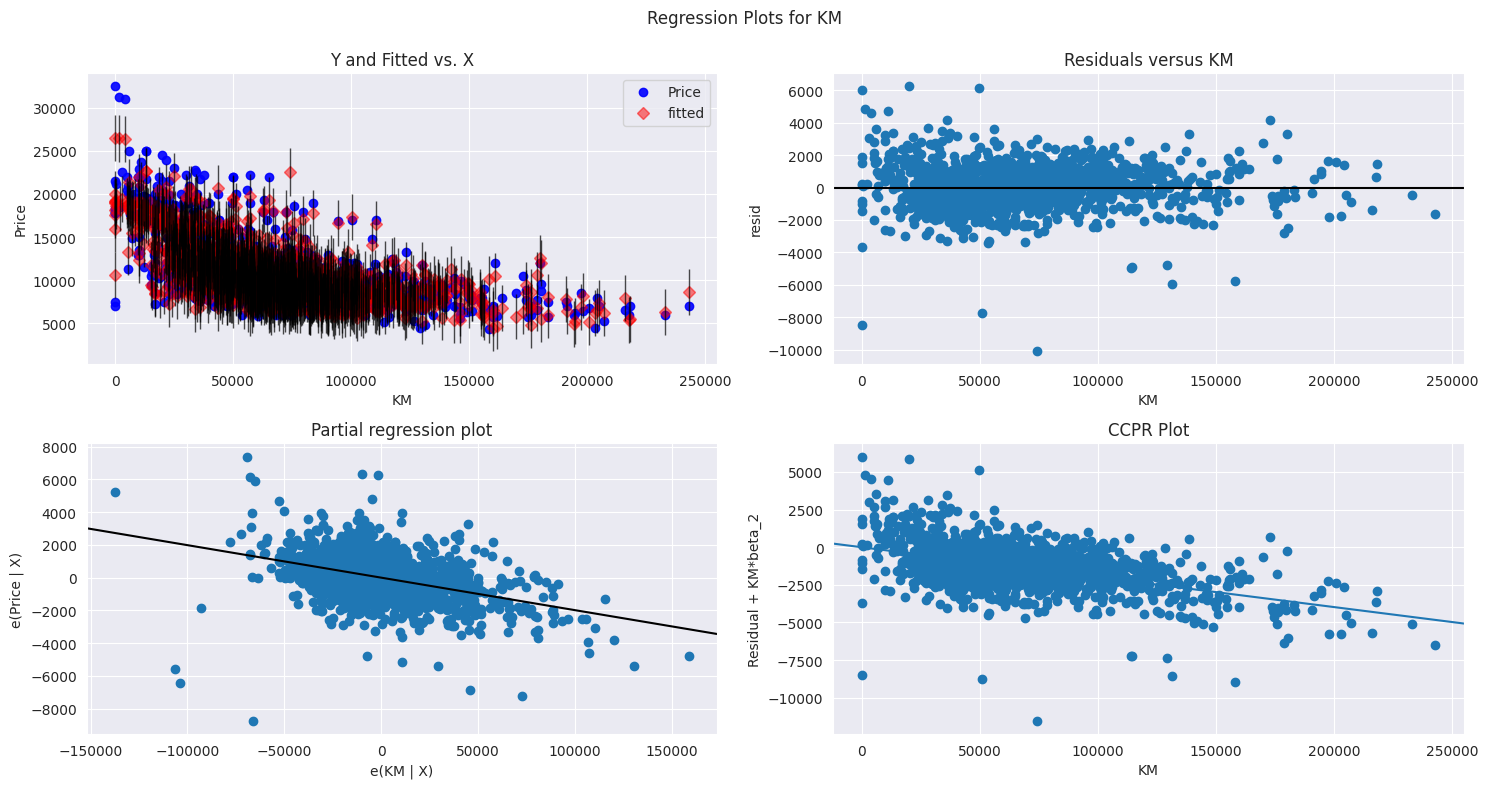

In [71]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

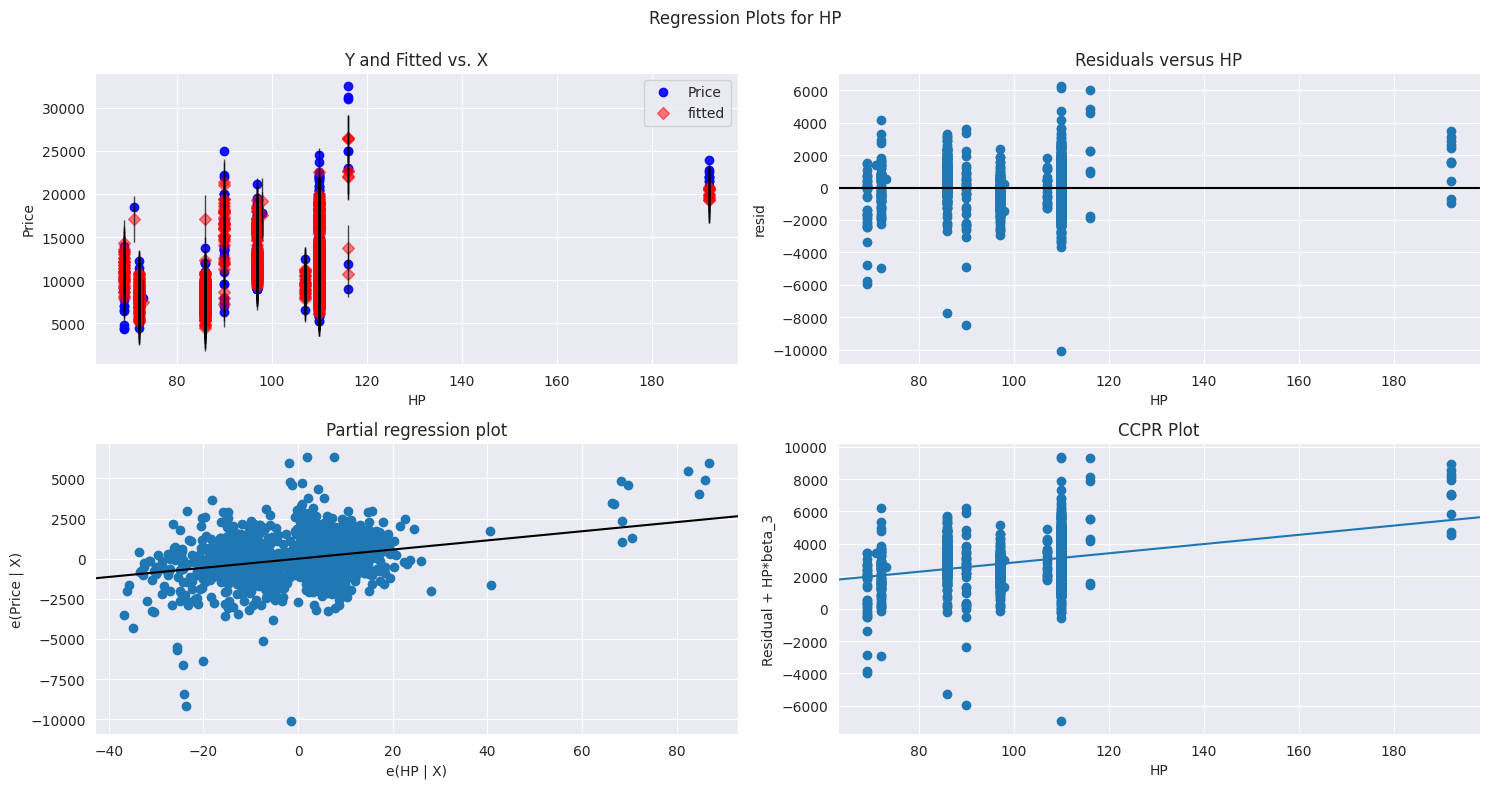

In [73]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

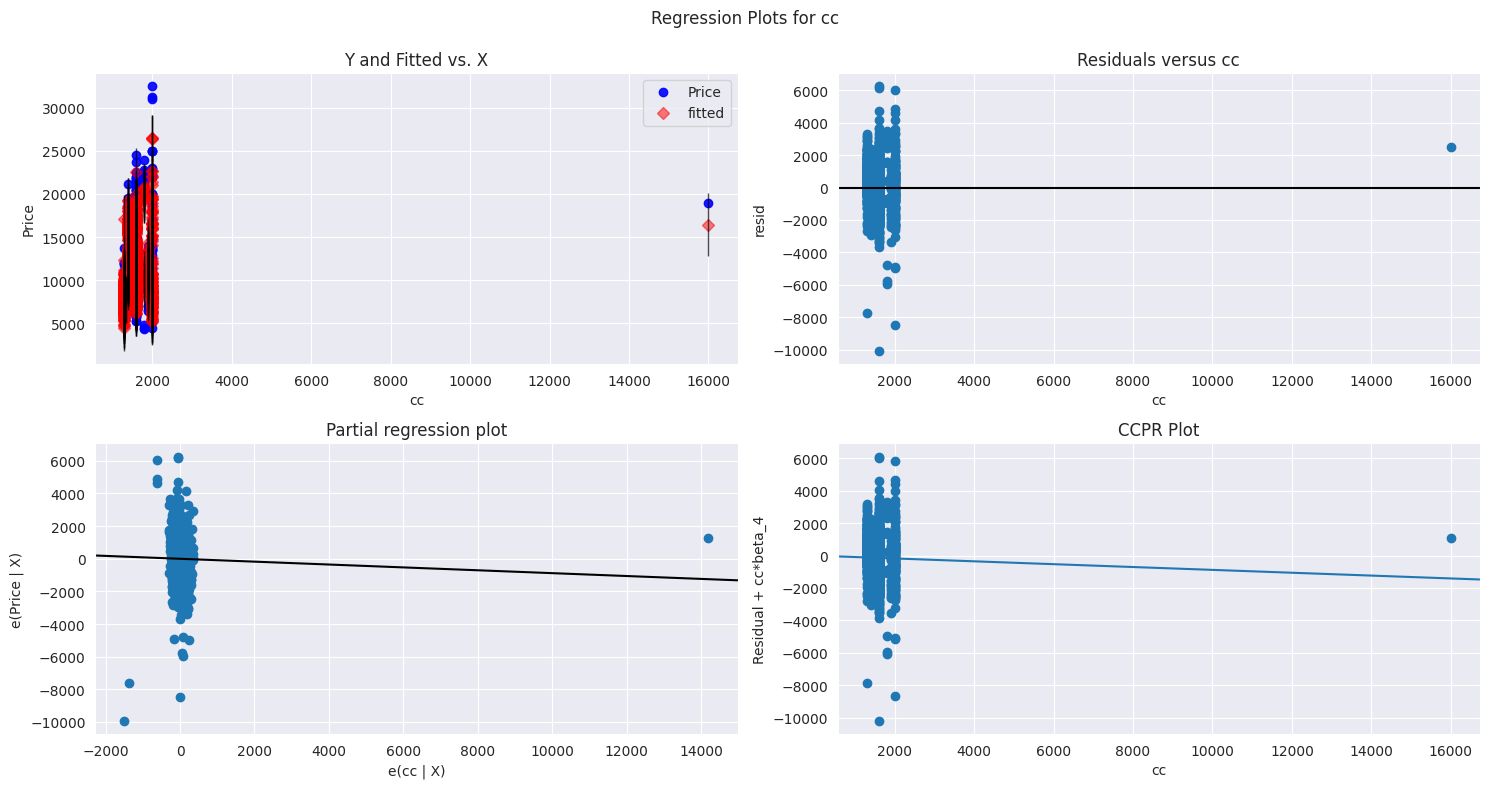

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

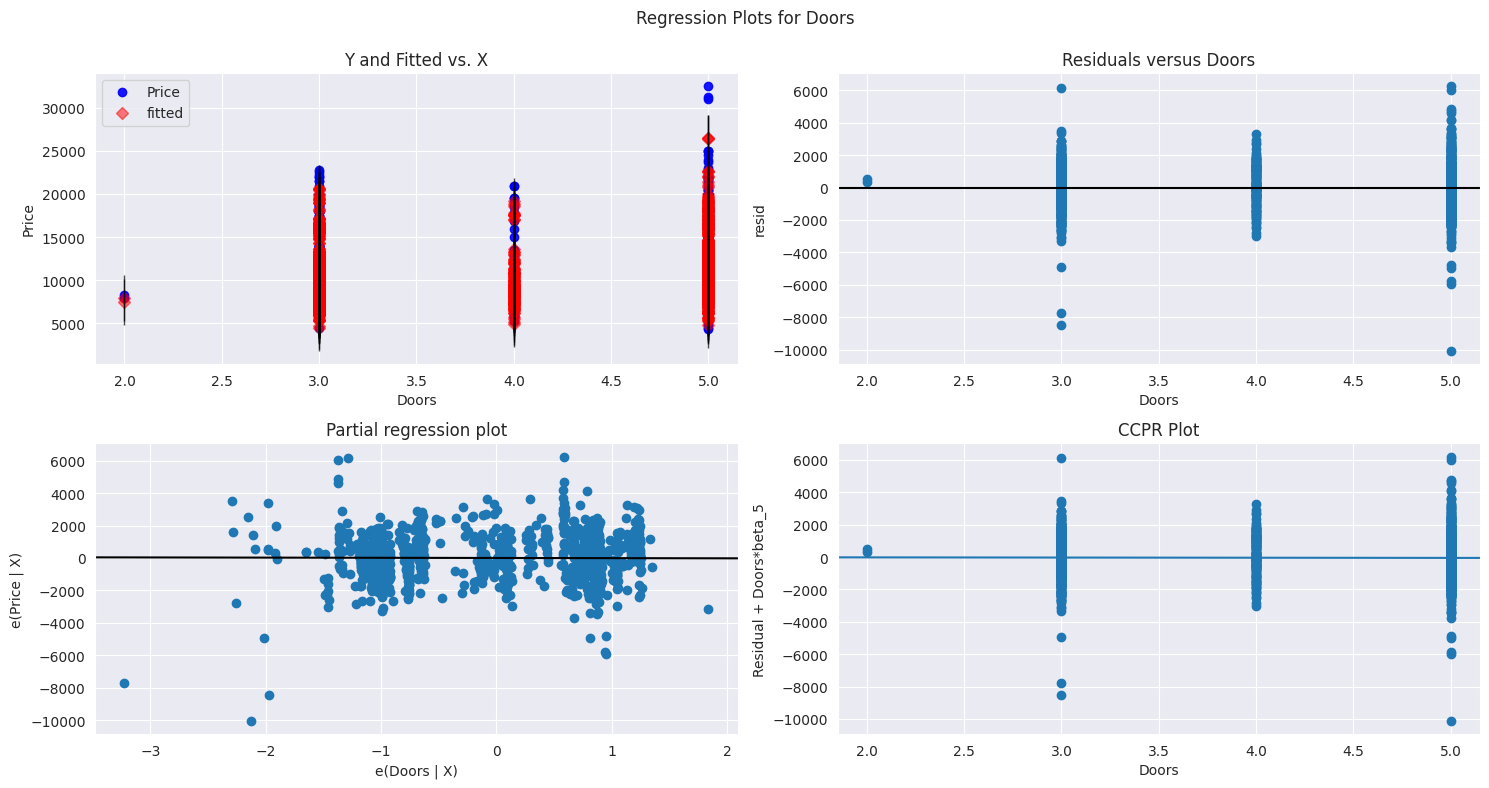

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

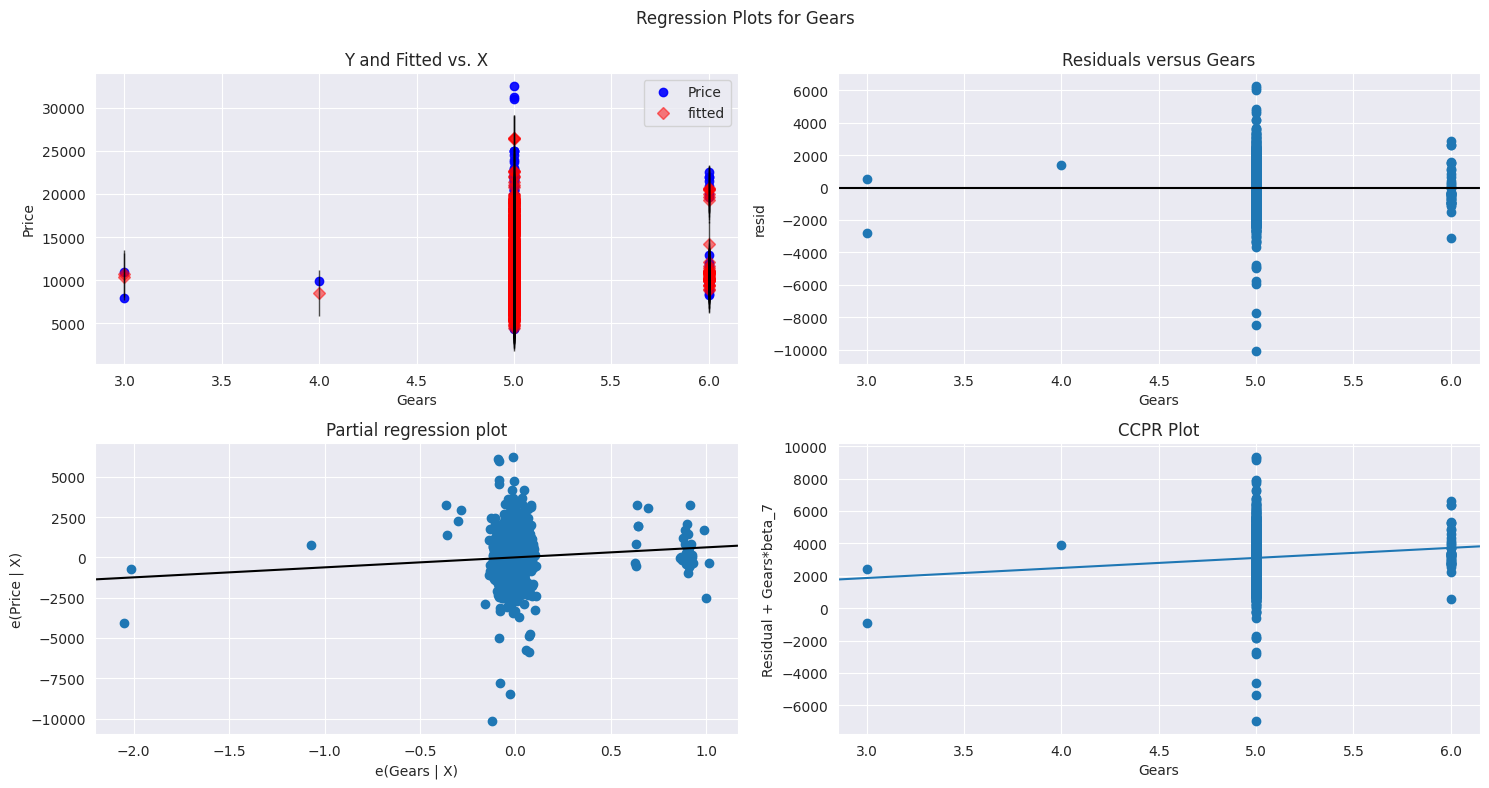

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

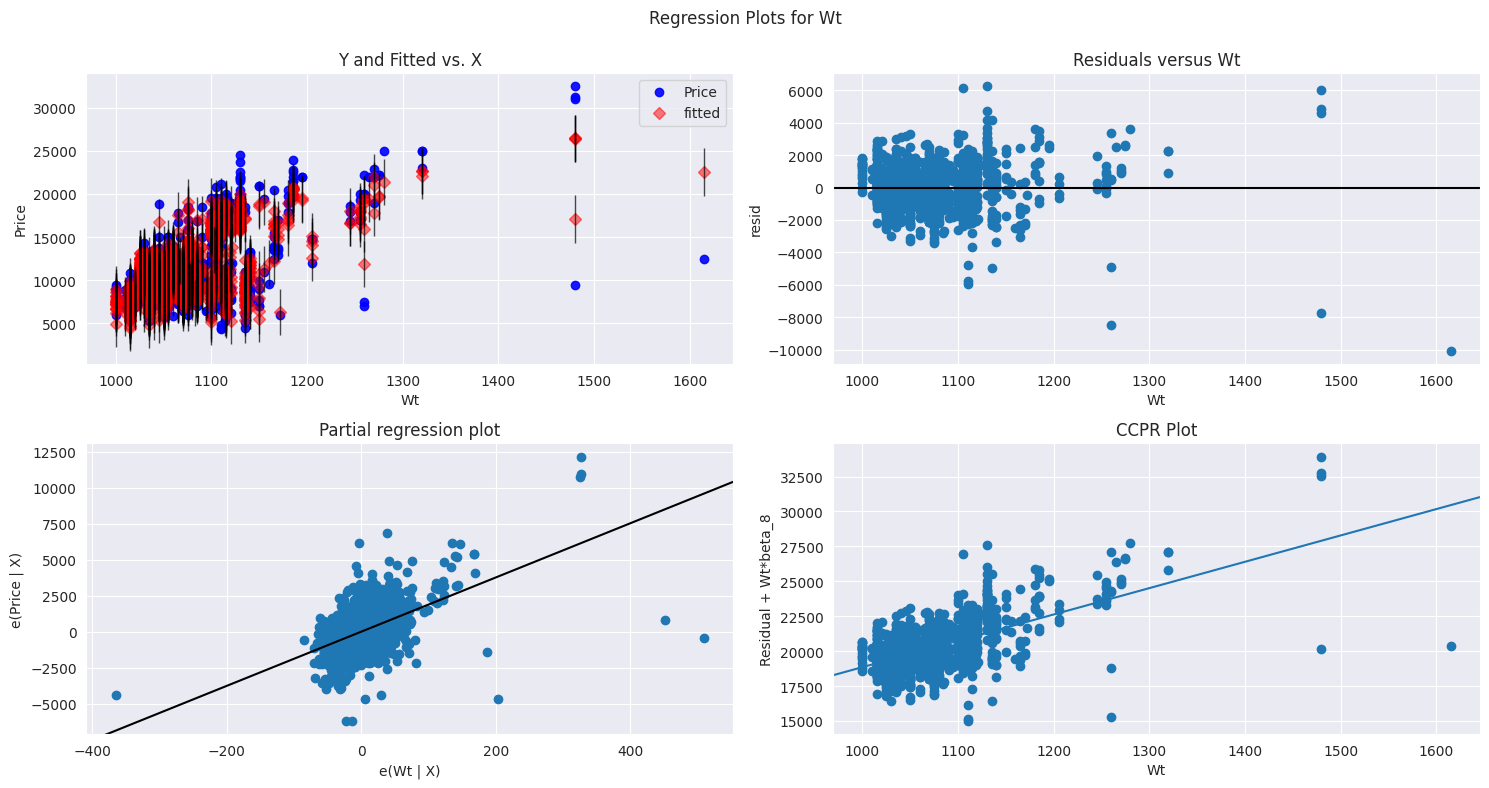

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Wt", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Cook's Distance

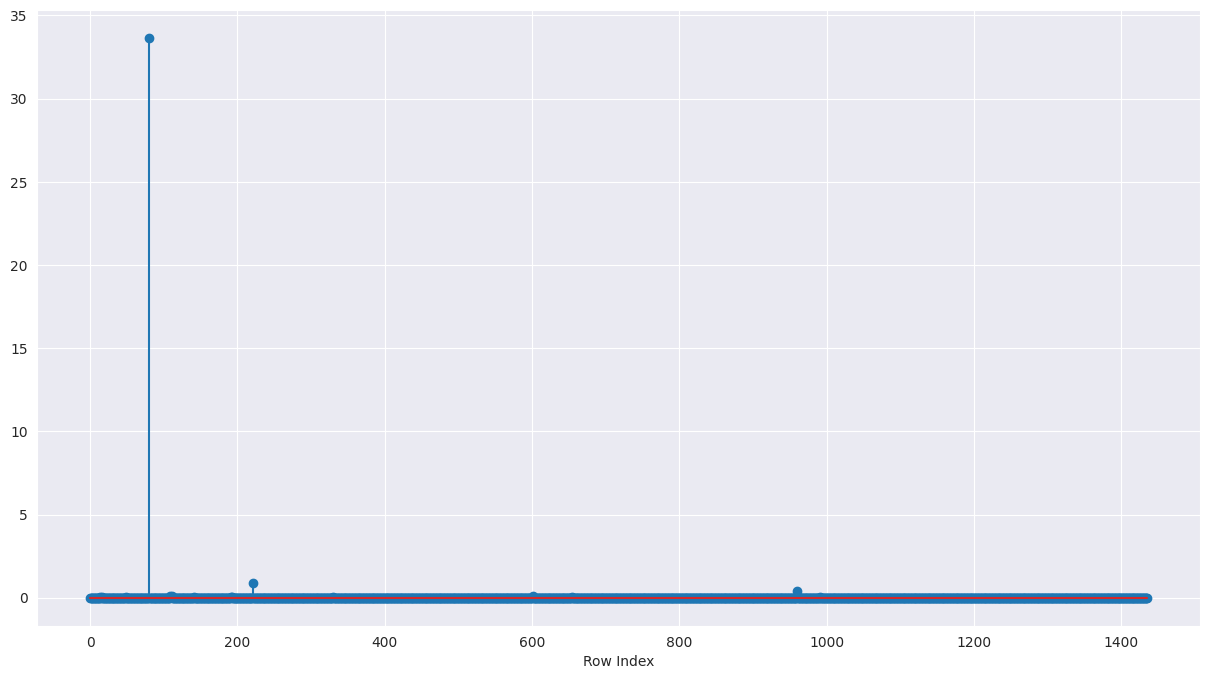

In [80]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
fig = plt.subplots(figsize=(15,8))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel;('Cooks Distance')
plt.show()


In [ ]:
(np.argmax(c),np.max(c))


# High Influence Points

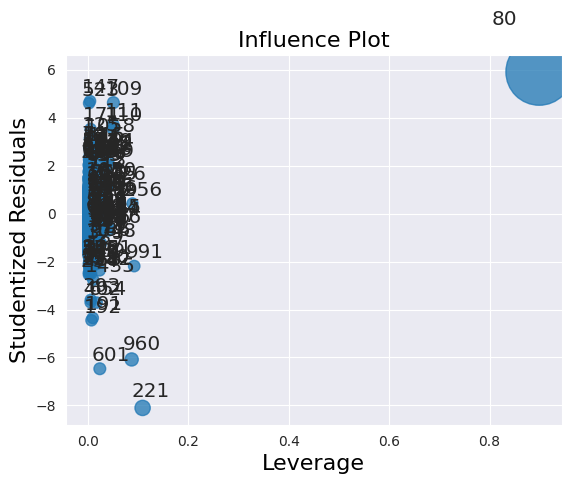

In [81]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [82]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.020891364902506964

In [83]:
model=smf.ols(formula ='Price~Age+KM+HP+cc+Doors+Gears+cy+Wt', data = data1).fit()
(model.rsquared,model.aic)

(0.8628951602234527, 24776.19238098143)

In [84]:
data1[data1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,cy,Gears,Wt
80,18950,25,20019,110,16000,5,4,5,1180


In [85]:
data2 = data1.drop(data1.index[[80]],axis=0).reset_index()
data2

,index,Price,Age,KM,HP,cc,Doors,cy,Gears,Wt
0,0,13500,23,46986,90,2000,3,4,5,1165
1,1,13750,23,72937,90,2000,3,4,5,1165
2,2,13950,24,41711,90,2000,3,4,5,1165
3,3,14950,26,48000,90,2000,3,4,5,1165
4,4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,4,5,1025
1431,1432,10845,72,19000,86,1300,3,4,5,1015
1432,1433,8500,71,17016,86,1300,3,4,5,1015
1433,1434,7250,70,16916,86,1300,3,4,5,1015


# Predicting for new data

In [87]:
new_data=pd.DataFrame({'Age':16, 'KM':1400, 'HP':41, 'cc': 3, 'Doors': 4, 'Gears':5, 'cy':5 , 'Wt':1038},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,cy,Wt
0,16,1400,41,3,4,5,5,1038


In [88]:
model2.predict(new_data)

0    13022.405786
dtype: float64

In [89]:
pred_y=model2.predict(data1)
pred_y

0       16545.147422
1       16029.486974
2       16527.728353
3       16158.290150
4       15952.090113
            ...     
1431     8764.047344
1432     8240.069857
1433     8401.729194
1434     8525.952429
1435    10644.829793
Length: 1436, dtype: float64